# Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

folder = "/content/drive/MyDrive/IE224-DataAnalysis"

Mounted at /content/drive/


# Import thư viện

In [ ]:
import math
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

sns.set_theme(style="darkgrid")

<ipython-input-2-f2ee0e36c330>:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Hàm phụ trợ

In [ ]:
def check_correlattion(col1: pd.Series, col2: pd.Series):
  coef, p = stats.pearsonr(col1, col2)
  if p < 0.05:
    return coef
  return 0

def create_price_plot(col_name, title, palette, df):

  f, ax = plt.subplots(figsize=(15, 5))
  sns.despine(f)

  sns.kdeplot(
      df,
      x="price (VND)", hue=col_name,
      multiple="stack",
      palette=palette,
      linewidth=.5,
      log_scale=True
  )
  ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
  ax.set_xticks([50000, 500000, 1000000, 5000000, 10000000, 20000000, 50000000, 300000000])

  plt.ticklabel_format(axis="x",style='plain')
  plt.title(title)

  plt.show()

def create_pie_plot(axes, title, counts, colors):
  axes.pie(counts, autopct='', startangle=140, colors=colors)
  axes.set_title(title)
  axes.legend(counts.index, loc='best', bbox_to_anchor=(1, 0.75))

def create_kde_plot(axes, title, data, color):
    sns.kdeplot(data, ax=axes, color=color)
    axes.set_title(title)

def create_displot(df, y, col):
  plot= sns.displot(
      data=df, x='price (VND)', y=y, col=col,
      height=8, aspect=.7,
  )

  for ax in plot.axes.flat:
      ax.tick_params(axis='x', labelrotation=45)


  plt.ticklabel_format(axis="x",style='plain')
  plt.xticks(rotation=45)
  plt.show()

def create_boxplot(df, filtered_df, x, rotation=None):
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  sns.boxplot(df, x=x, y='price (VND)', ax=axes[0])
  sns.boxplot(filtered_df, x=x, y='price (VND)', ax=axes[1])
  axes[0].tick_params(axis='x', labelrotation=rotation)
  axes[1].tick_params(axis='x', labelrotation=rotation)
  axes[0].ticklabel_format(axis="y", style='plain')
  axes[1].ticklabel_format(axis="y", style='plain')
  plt.tight_layout()
  plt.show()

# Đọc dữ liệu

In [ ]:
df = pd.read_csv(folder + "/data_preprocessing.csv", index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6635
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pc_brand             6636 non-null   object 
 1   pc_model             6636 non-null   object 
 2   elt_condition        6636 non-null   object 
 3   elt_warranty         6636 non-null   object 
 4   desktop_screen_size  6636 non-null   object 
 5   pc_cpu               6636 non-null   object 
 6   pc_ram               6636 non-null   object 
 7   pc_vga               6636 non-null   object 
 8   pc_drive_capacity    6636 non-null   object 
 9   elt_origin           6636 non-null   object 
 10  classify             6636 non-null   object 
 11  price (VND)          6636 non-null   float64
 12  pc_cpu_label         6636 non-null   object 
dtypes: float64(1), object(12)
memory usage: 725.8+ KB


In [ ]:
df.describe()

,price (VND)
count,6.636000e+03
mean,7.458395e+06
std,8.221641e+06
min,5.000000e+04
25%,2.900000e+06
50%,5.400000e+06
75%,9.300000e+06
max,2.590000e+08


In [ ]:
filtered_df = df[df['price (VND)'] < 100000000]

# Giá tiền

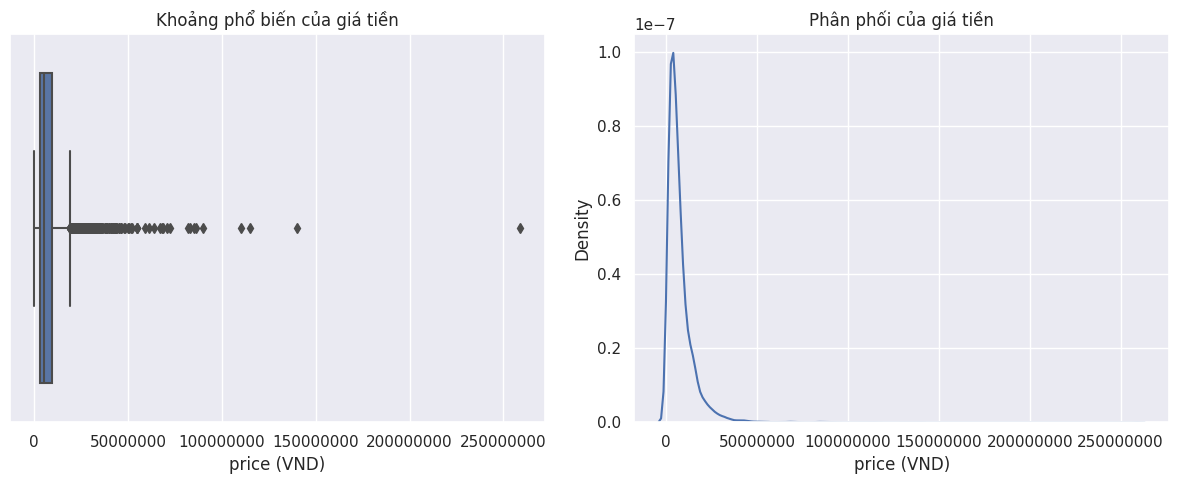

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='price (VND)', data=df, ax=axes[0])
sns.kdeplot(x='price (VND)', data=df, ax=axes[1])
axes[0].ticklabel_format(axis="x", style='plain')
axes[1].ticklabel_format(axis="x", style='plain')
axes[0].set_title('Khoảng phổ biến của giá tiền')
axes[1].set_title('Phân phối của giá tiền')
plt.tight_layout()
plt.show()

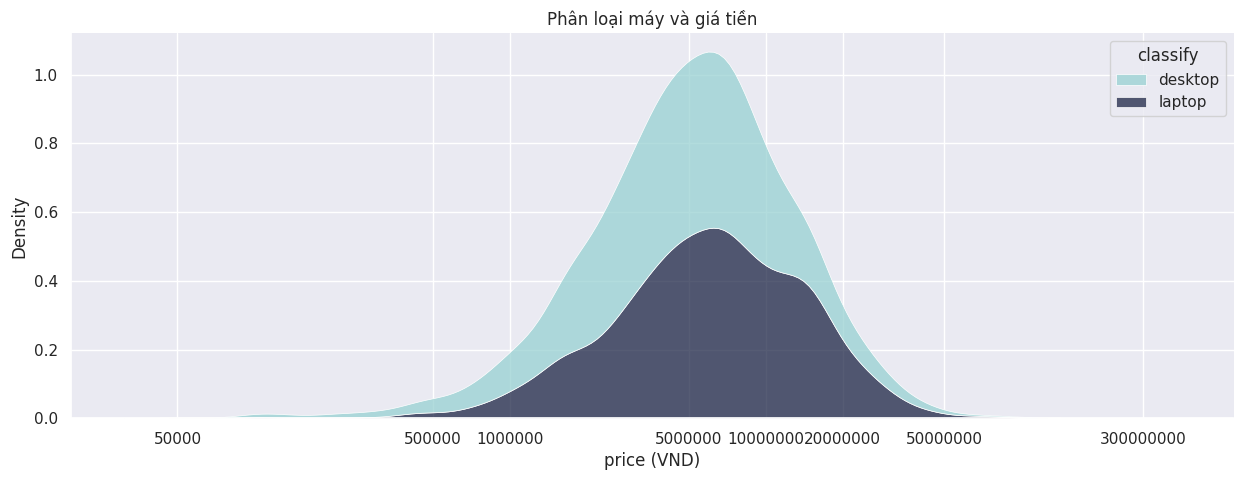

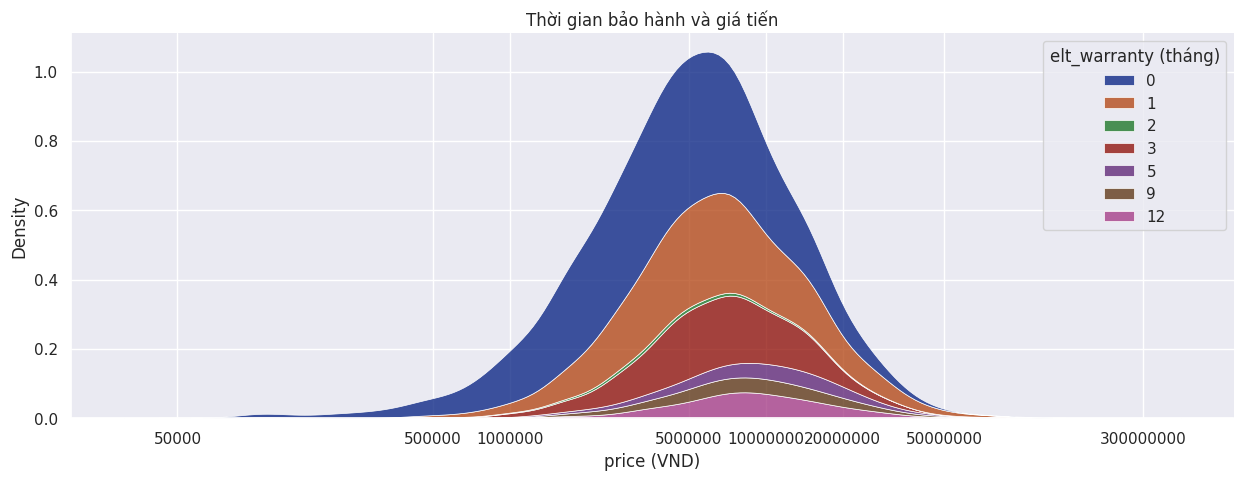

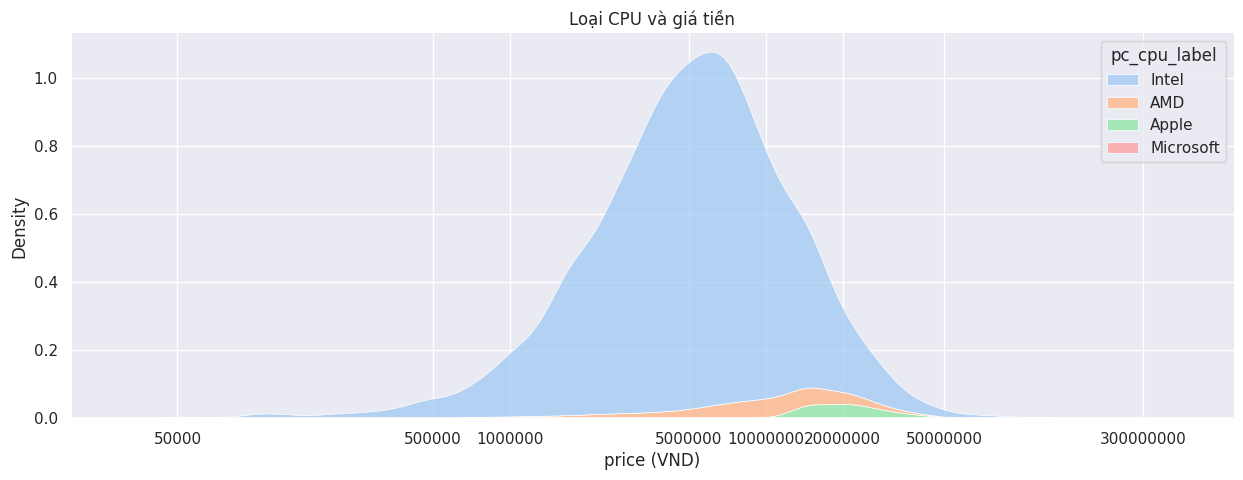

In [ ]:
plot_cols = [
    ('classify', 'Phân loại máy và giá tiền', "ch:rot=-.25,hue=1,light=.75"),
    ('elt_warranty (tháng)','Thời gian bảo hành và giá tiến', 'dark'),
    ('pc_cpu_label', 'Loại CPU và giá tiền', 'pastel')
]

for col_name, title, palette in plot_cols:
  create_price_plot(col_name, title, palette, df)

# Biến phân loại

## Tỷ lệ giữa các giá trị của các biến phân loại

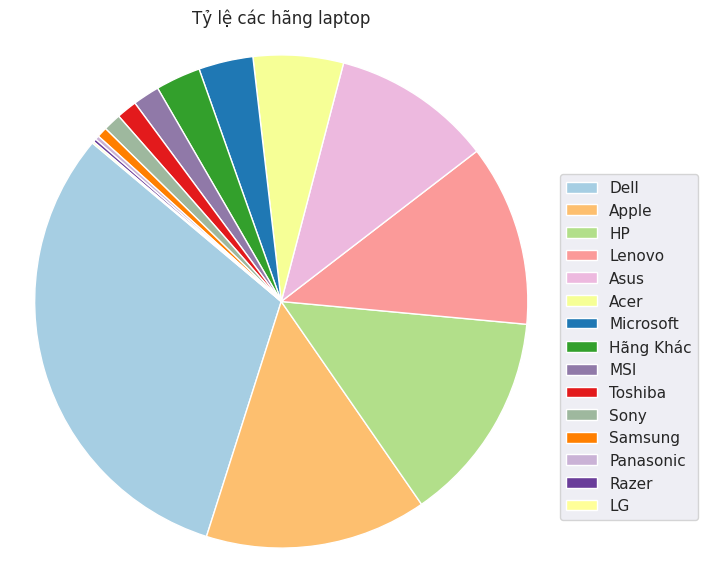

In [ ]:
pc_brand_counts = df[df['classify'] == 'laptop']['pc_brand'].value_counts()
pastel_colors = [
    '#a6cee3', '#fdbf6f', '#b2df8a', '#fb9a99', '#edb9df',
    '#f6ff96', '#1f78b4', '#33a02c', '#9079a8', '#e31a1c',
    '#9eb89e', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99'
]
plt.figure(figsize=(7, 7))
plt.title('Tỷ lệ các hãng laptop')
plt.pie(pc_brand_counts, autopct='', startangle=140, colors=pastel_colors)
plt.legend(pc_brand_counts.index, loc='best', bbox_to_anchor=(1, 0.75))

plt.axis('equal')
plt.show()

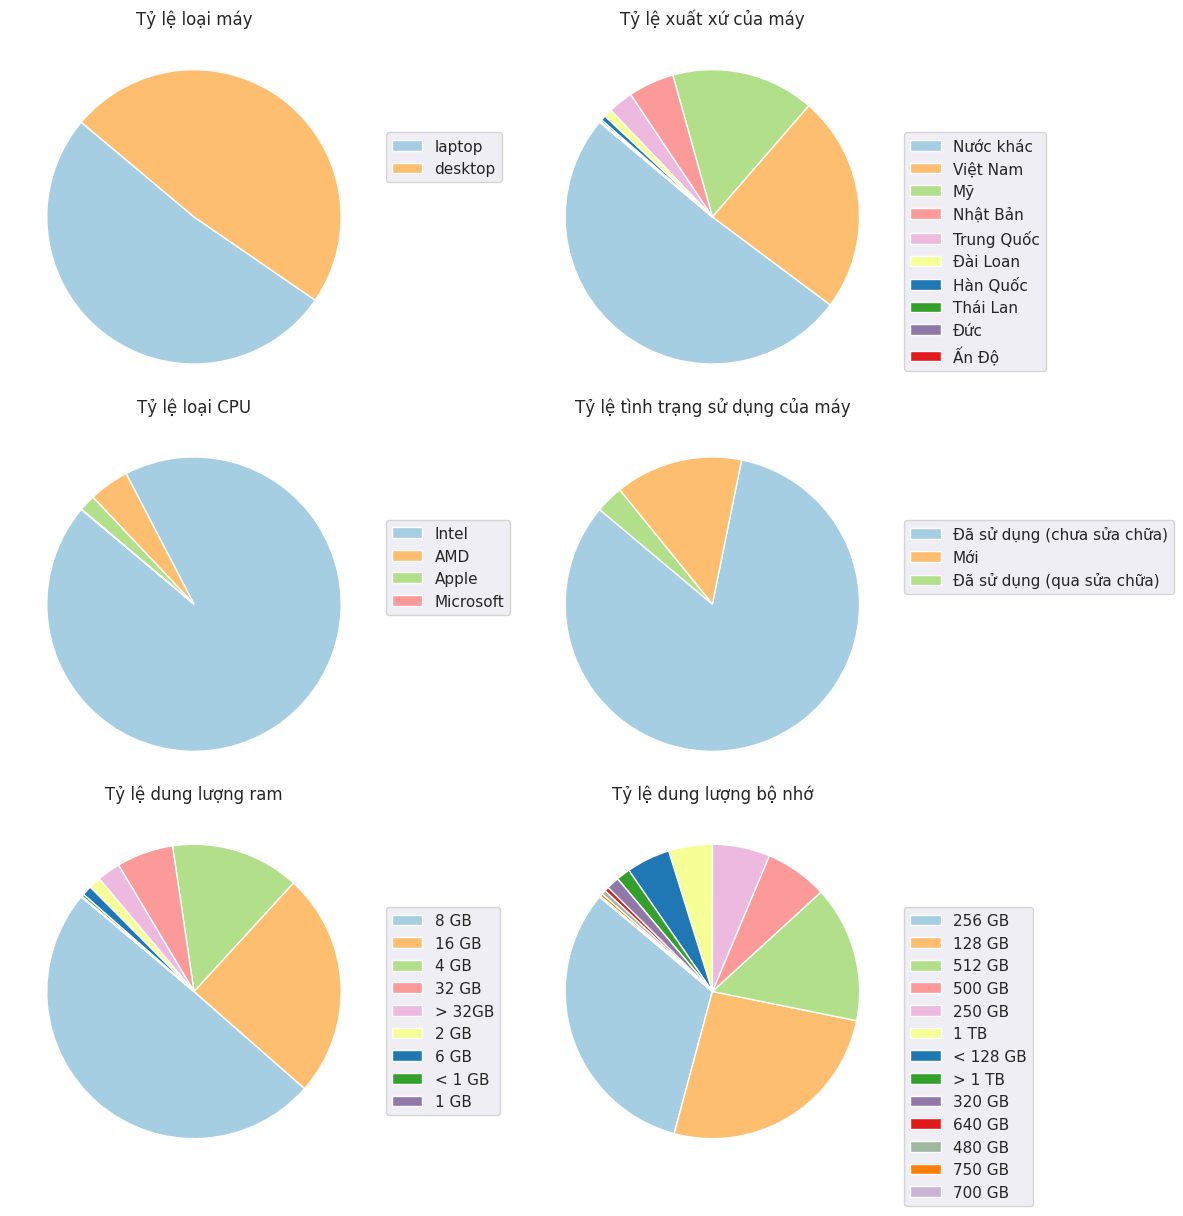

In [ ]:
cols = [('classify', "Tỷ lệ loại máy"),
        ('elt_origin', 'Tỷ lệ xuất xứ của máy'),
        ('pc_cpu_label', 'Tỷ lệ loại CPU'),
        ('elt_condition', 'Tỷ lệ tình trạng sử dụng của máy'),
        ('pc_ram', 'Tỷ lệ dung lượng ram'),
        ('pc_drive_capacity', 'Tỷ lệ dung lượng bộ nhớ')]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
  for j in range(2):
    col_name, title = cols[2*i + j]
    create_pie_plot(axes[i, j], title, df[col_name].value_counts(), pastel_colors)

fig.subplots_adjust(hspace=-0.5)
fig.tight_layout()
fig.show()

## Mức độ ảnh hưởng của biến phân loại

In [ ]:
object_columns = df.select_dtypes(include=['object'])
object_columns.columns

Index(['pc_brand', 'pc_model', 'elt_condition', 'elt_warranty', 'desktop_screen_size', 'pc_cpu',
       'pc_ram', 'pc_vga', 'pc_drive_capacity', 'elt_origin', 'classify', 'pc_cpu_label'],
      dtype='object')

In [ ]:
grouped_data = {}
for column in object_columns:
  buffer = df.groupby(column)['price (VND)'].apply(lambda x: x.to_numpy())
  grouped_data[column] ={"values": buffer,
                         "keys": list(buffer.index)}

categories = list(grouped_data.keys())
results = []
for category in categories:
  data = list(grouped_data[category]['values'].values)
  f, p = stats.f_oneway(*data)
  results.append([category, f, p, 'yes' if p < 0.05 else 'no'])

columns = ['Variable name', 'F-test', 'P-value', 'Is significant']
df_results = pd.DataFrame(results, columns=columns)

In [ ]:
df_results.sort_values(by='F-test', ascending=False).reset_index(drop=True)

,Variable name,F-test,P-value,Is significant
0,pc_ram,236.886649,0.000000e+00,yes
1,elt_condition,189.865192,6.553893e-81,yes
2,pc_drive_capacity,173.238715,0.000000e+00,yes
3,pc_cpu_label,171.129723,7.332339e-107,yes
4,pc_vga,170.881872,4.321303e-73,yes
5,pc_cpu,120.844553,0.000000e+00,yes
6,classify,92.396042,9.826792e-22,yes
7,elt_warranty,82.308319,3.730625e-115,yes
8,desktop_screen_size,40.420181,1.725495e-63,yes
9,pc_brand,25.754897,8.159431e-71,yes


# Phân khúc giá theo các biến phân loại

## Phân khúc giá của máy theo tình trạng sử dụng

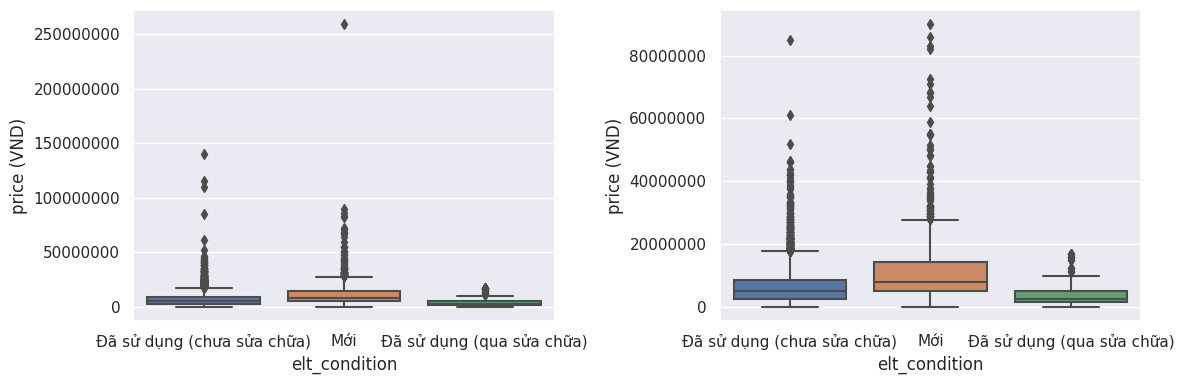

In [ ]:
create_boxplot(df, filtered_df, 'elt_condition')

## Phân khúc giá của các loại card màn hình

Thực hiện trực quan trên dữ liệu thô và dữ liệu đã loại outliers (chỉ loại bỏ outliers với mục đích trực quan hóa)

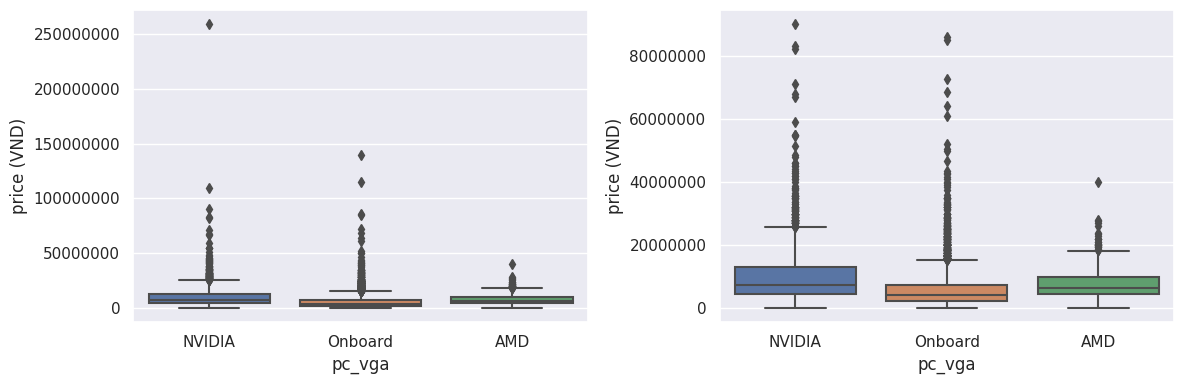

In [ ]:
create_boxplot(df, filtered_df, 'pc_vga')

## Phân khúc giá của các loại cpu

Thực hiện trực quan trên dữ liệu thô và dữ liệu đã loại outliers (chỉ loại bỏ outliers với mục đích trực quan hóa)

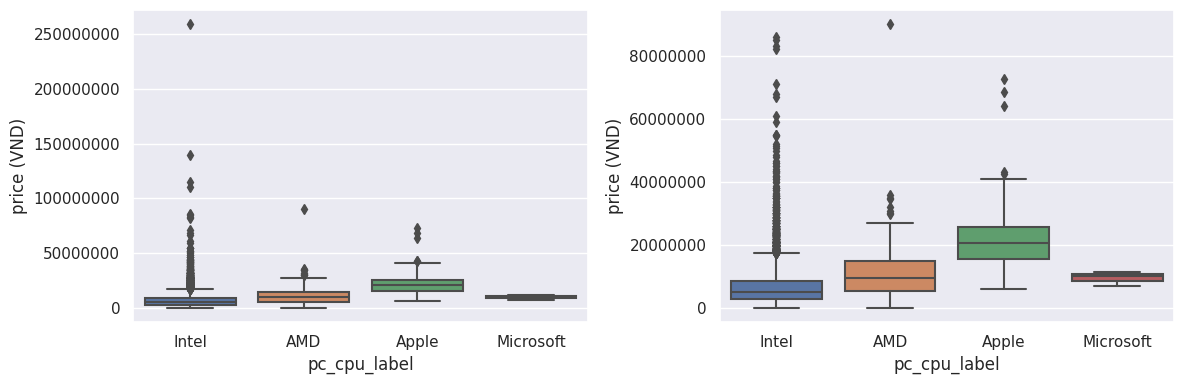

In [ ]:
create_boxplot(df, filtered_df, 'pc_cpu_label')

## Phân khúc giá của các dòng cpu

Thực hiện trực quan trên dữ liệu thô và dữ liệu đã loại outliers (chỉ loại bỏ outliers với mục đích trực quan hóa)

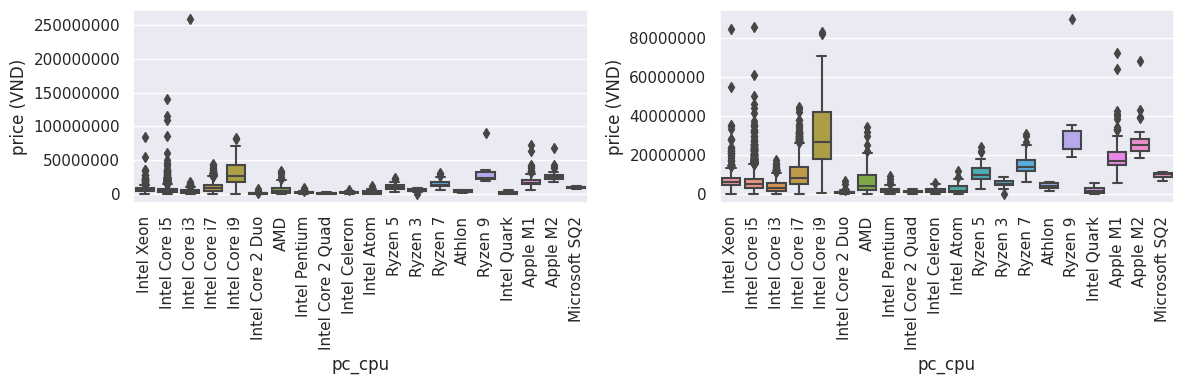

In [ ]:
create_boxplot(df, filtered_df, 'pc_cpu', 90)

## Phân khúc giá theo dung lượng ram

Thực hiện trực quan trên dữ liệu thô và dữ liệu đã loại outliers (chỉ loại bỏ outliers với mục đích trực quan hóa)

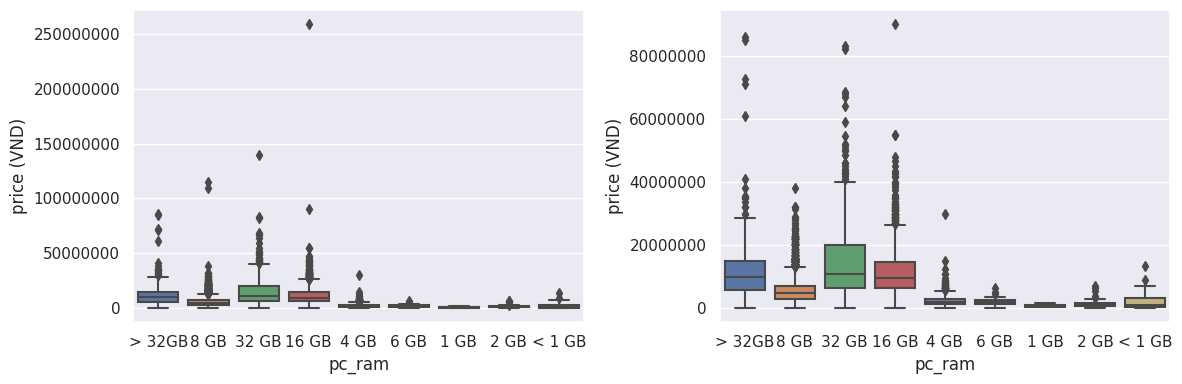

In [ ]:
create_boxplot(df, filtered_df, 'pc_ram')

## Phân khúc giá theo dung lượng bộ nhớ

Thực hiện trực quan trên dữ liệu thô và dữ liệu đã loại outliers (chỉ loại bỏ outliers với mục đích trực quan hóa)

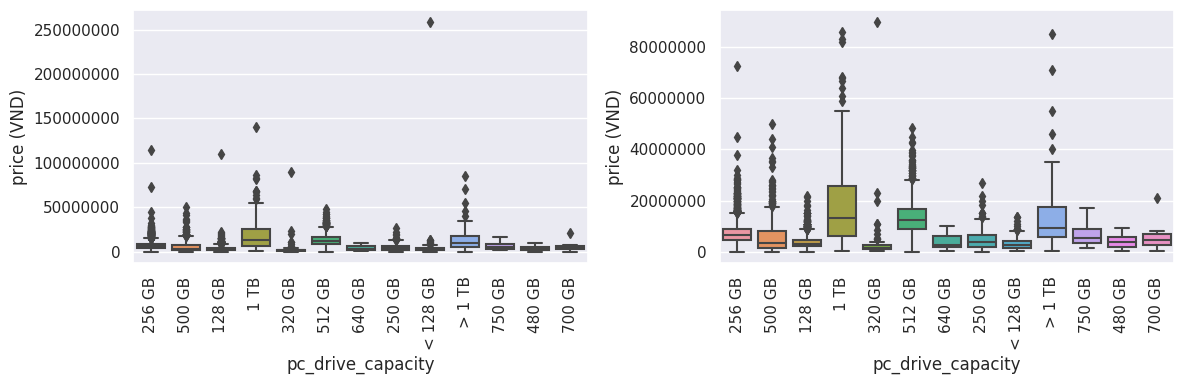

In [ ]:
create_boxplot(df, filtered_df, 'pc_drive_capacity',90)

# Giá máy theo tình trạng sử dụng và nhãn hiệu

Trong hai trường hợp: bao gồm outliers và không bao gồm outliers

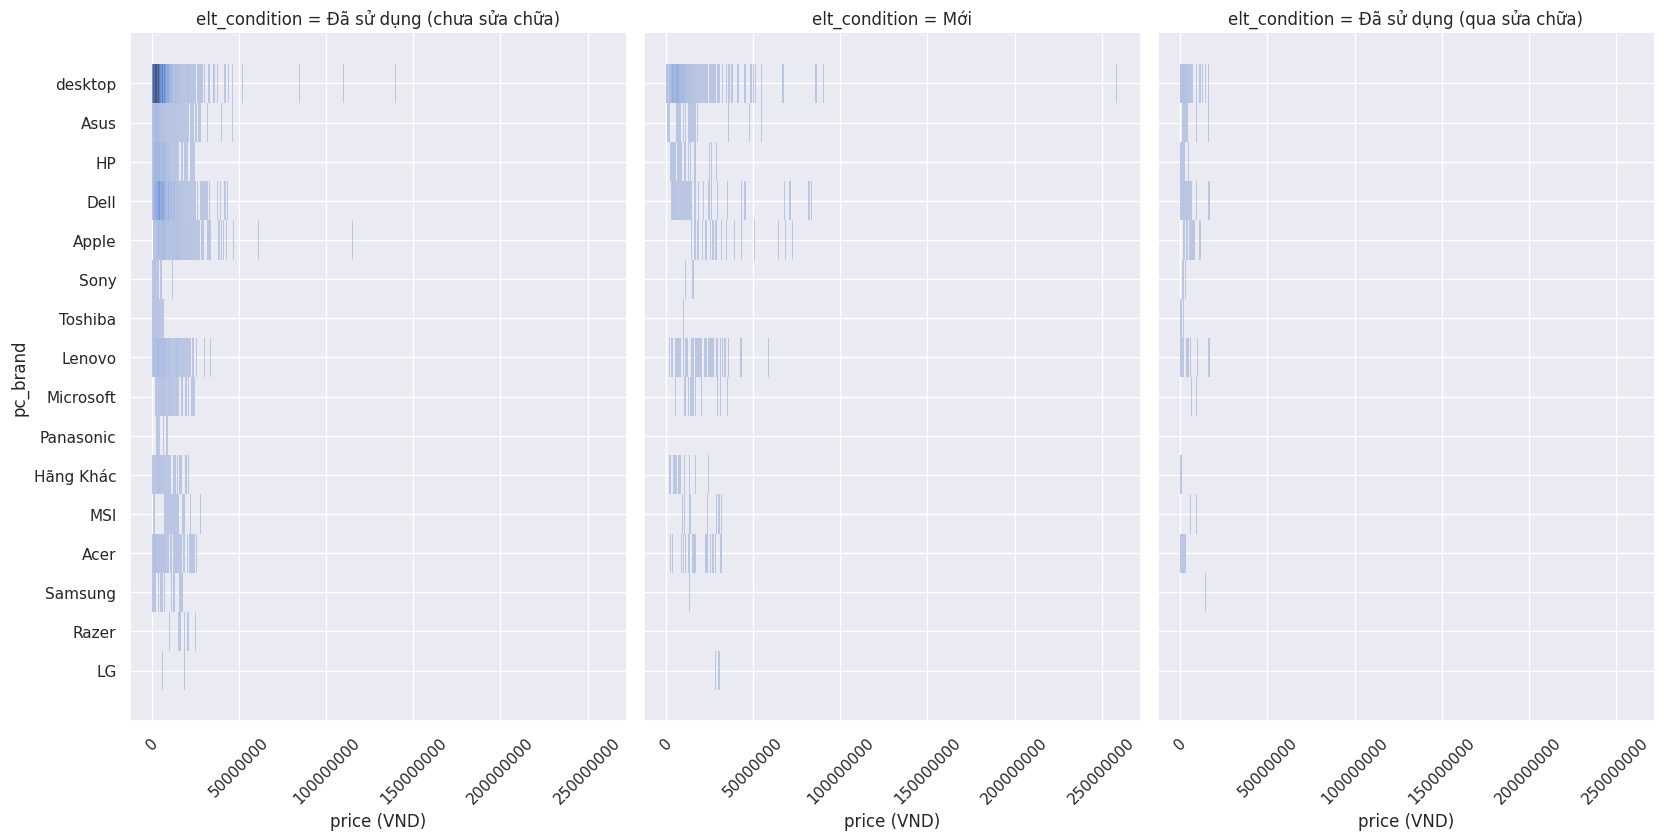

In [ ]:
create_displot(df, 'pc_brand', 'elt_condition')

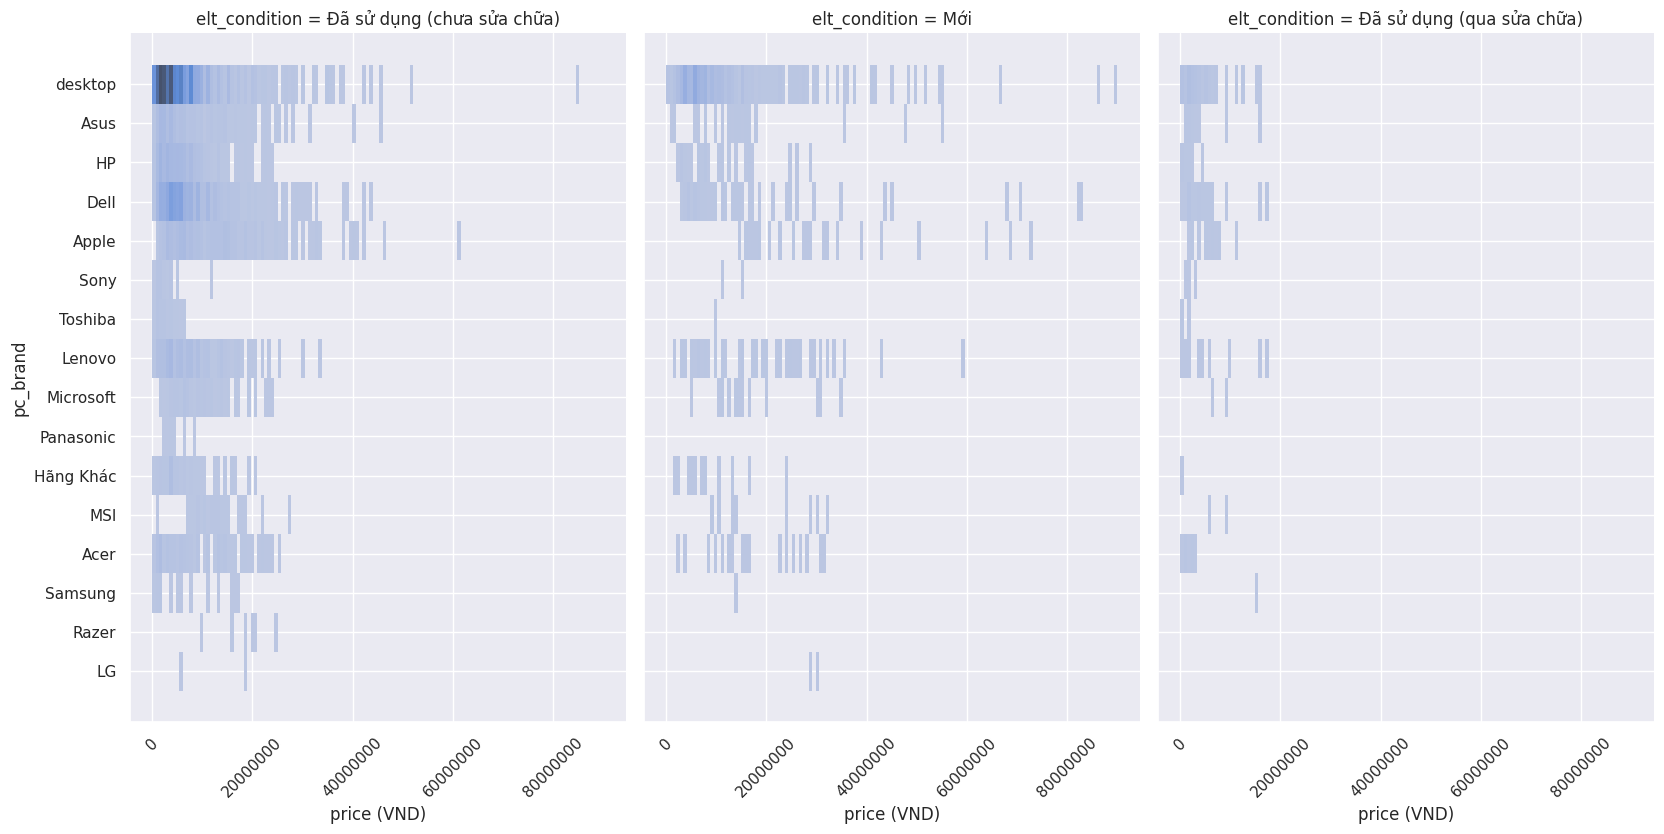

In [ ]:
create_displot(filtered_df, 'pc_brand', 'elt_condition')

# Biểu đồ tương quan về giá, RAM, loại CPU và tình trạng sử dụng của máy

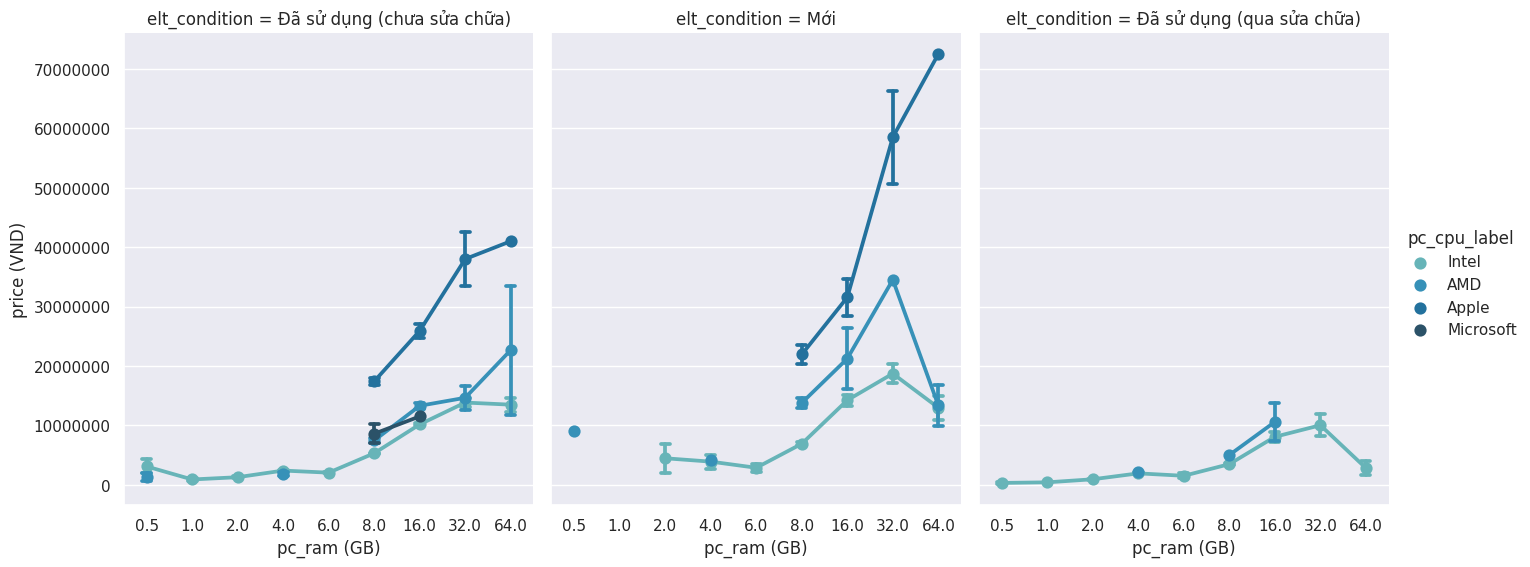

In [ ]:
sns.catplot(
    data=df, x="pc_ram (GB)", y="price (VND)", hue="pc_cpu_label", col="elt_condition",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)

plt.ticklabel_format(axis="y",style='plain')
plt.show()

# Biểu đồ phân bố của máy theo giá và model

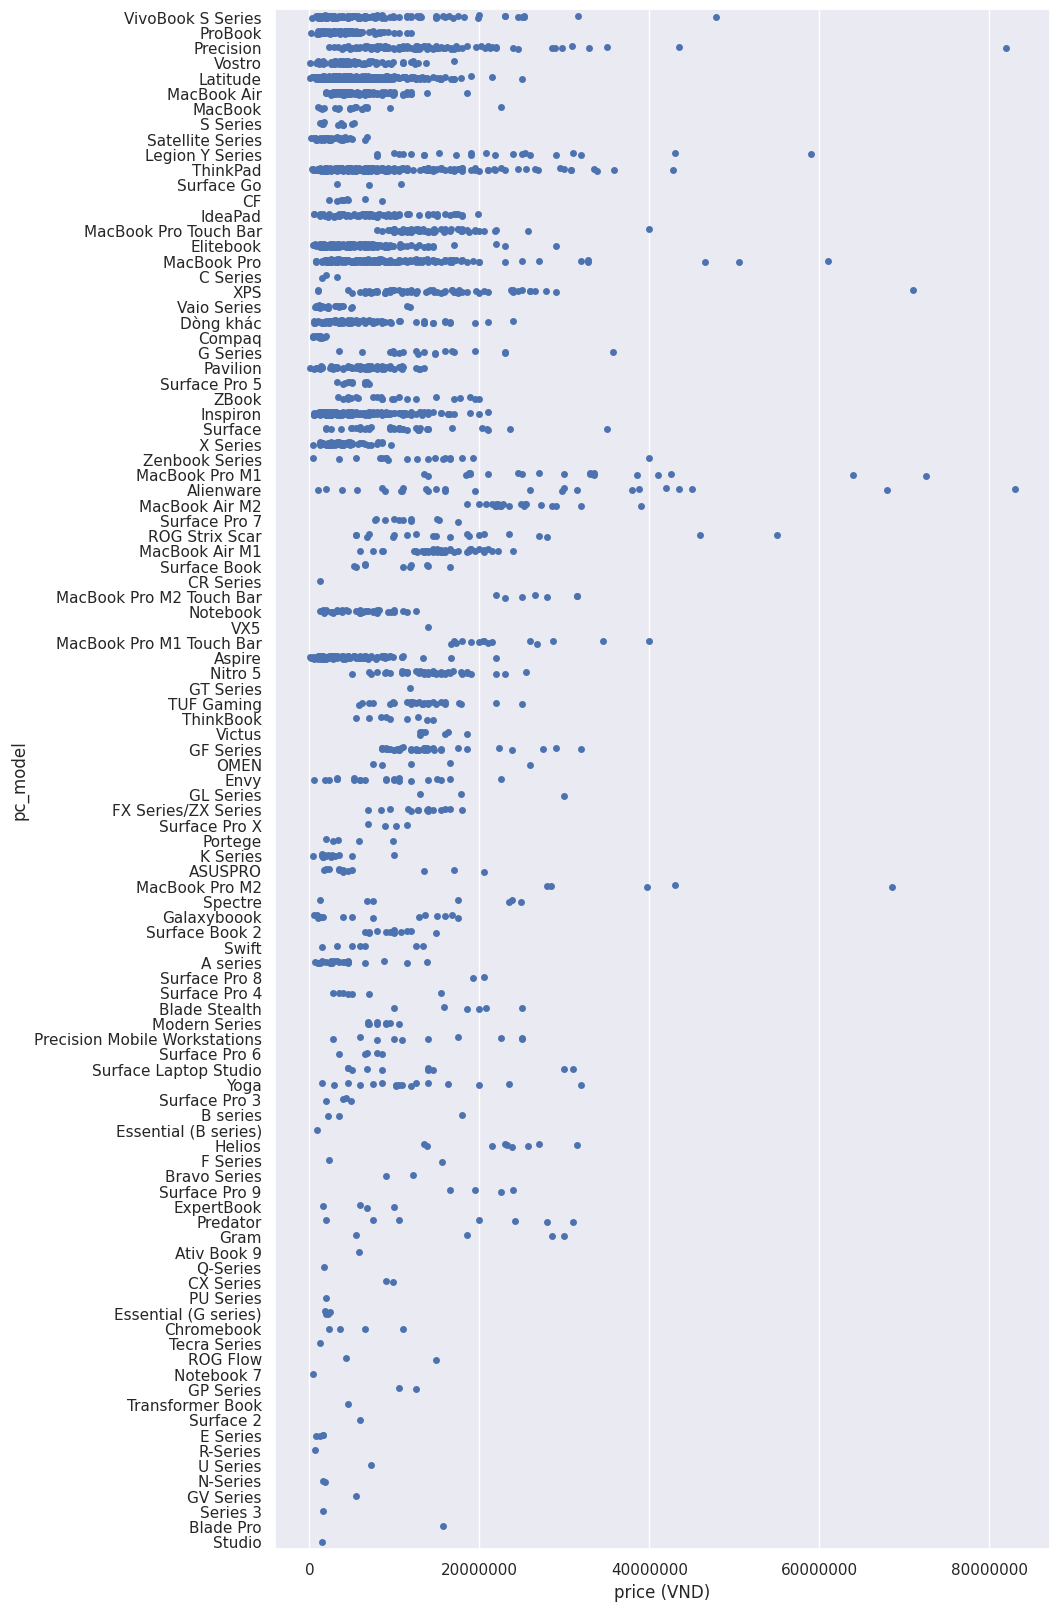

In [ ]:
plt.figure(figsize=(10, 20))
sns.stripplot(data=filtered_df[filtered_df['classify'] == 'laptop'], x="price (VND)", y="pc_model")
plt.ticklabel_format(axis="x",style='plain')
plt.show()